In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [16]:
df=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Simple linear regression/delivery_time.csv")
df.head()


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [17]:
d=df.iloc[:,0]
s=df.iloc[:,1]


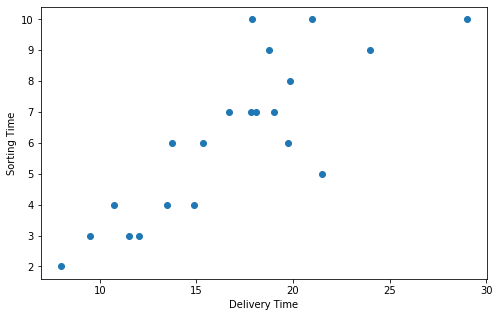

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(d,s)
plt.xlabel('Delivery Time')
plt.ylabel("Sorting Time")
plt.show()

In [19]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### MODEL


In [20]:
d.values.reshape(-1,1).shape

(21, 1)

In [21]:
lr=LinearRegression()
X=d.values.reshape(-1,1)
Y=s.values.reshape(-1,1)
linear_reg=lr.fit(X,Y)


In [22]:
(X)

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [23]:
(Y)

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]])

In [24]:
print(linear_reg.coef_)
print(linear_reg.intercept_)

[[0.41374363]]
[-0.75667337]


In [25]:
linear_reg.predict(X)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

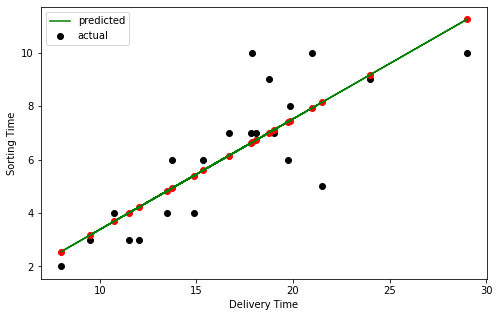

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(d,s,color="black",label="actual");
plt.plot(d,linear_reg.predict(X),color="green",linestyle="-",label="predicted");
plt.scatter(d,linear_reg.predict(X),color="red")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.legend(loc="best")
plt.show()



In [27]:
pred_train_lm= linear_reg.predict(X)
r2_score(s,pred_train_lm)

0.682271474841723

## **Model**

In [28]:
df=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Simple linear regression/delivery_time.csv")


In [31]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [33]:
Model=smf.ols("SortingTime~DeliveryTime",data=df).fit()

PatsyError: ignored

In [ ]:
Model.params

In [ ]:
Model.summary()

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df.DeliveryTime,(df.SortingTime),color="black",label="actual");
plt.plot(df.DeliveryTime,Model.predict(df['DeliveryTime']),color="red",linestyle="-",label="predicted");
plt.scatter(df.DeliveryTime,Model.predict(df['DeliveryTime']),color="red")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.legend(loc="best")
plt.show()


In [ ]:
Model2=smf.ols('SortingTime~np.log(DeliveryTime)',data=df).fit()
Model2.summary()

In [ ]:
Model2=smf.ols('np.log(SortingTime)~DeliveryTime',data=df).fit()
Model2.summary()

In [ ]:
smf.ols('SortingTime~np.exp(DeliveryTime)',data=df).fit().summary()

In [ ]:
df["Delivery_Sq"]=df.SortingTime**2
Model_quad=smf.ols('np.log(SortingTime)~DeliveryTime+Delivery_Sq',data=df).fit()
Model_quad.summary()

In [ ]:
df

In [ ]:
np.exp(Model_quad.predict(df[["DeliveryTime","Delivery_Sq"]]))